In [2]:
import pandas as pd
import os
import numpy as np
from tqdm.notebook import tqdm 


In [3]:
df_path = pd.read_csv("Data_paths.csv")


In [4]:
df_path = df_path.groupby('moa').head(1000)


In [5]:
N = df_path.shape[0]
X = np.empty(shape=(N,68,68,3), dtype="int16")

In [6]:
for index, path in tqdm(enumerate(df_path['path']), total = N):
    image = np.load(path)
    X[index,:,:,:] = image
print(X.shape)

  0%|          | 0/13000 [00:00<?, ?it/s]

(13000, 68, 68, 3)


In [7]:
X = X.reshape(X.shape[0], -1)
Z = X/255

#Z = (X - mu)/sigma

In [8]:
68*68*3

13872

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3000)
pca.fit(Z)

PCA(n_components=3000)

In [10]:
pca.components_.shape

(3000, 13872)

In [15]:
pca.components_

array([[ 1.40651871e-02, -1.83322660e-03, -1.69447251e-03, ...,
         1.40385245e-02, -2.50221755e-03, -2.22093748e-03],
       [ 2.68141039e-03,  6.99069837e-03,  5.84398769e-03, ...,
         2.52388183e-03,  6.78831516e-03,  5.60077810e-03],
       [-3.84155126e-03, -9.48113723e-03, -9.46537350e-05, ...,
        -3.54046787e-03, -8.61104511e-03,  1.17702114e-03],
       ...,
       [-6.06034363e-04,  7.73964475e-04, -5.88714715e-03, ...,
        -1.19871066e-03,  1.23149614e-02, -4.85552395e-03],
       [ 2.34153861e-03, -5.44936210e-03, -2.24181490e-03, ...,
        -4.15759693e-03,  1.61637033e-02, -1.20580970e-02],
       [ 9.71661130e-03, -4.50098175e-05, -7.30966182e-03, ...,
         5.04444141e-03, -6.37623100e-03,  9.32426336e-03]])

In [24]:
np.diag(np.cov(Z))

array([0.01473788, 0.0109705 , 0.00622623, ..., 0.00641663, 0.0075783 ,
       0.00684098])

In [37]:
px = list(range(len(np.diag(np.cov(Z)))))

In [48]:
py = np.sort(np.diag(np.cov(Z)))[::-1]

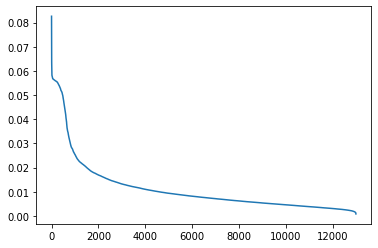

In [49]:
py = np.sort(np.diag(np.cov(Z)))[::-1]
plt.plot(py)

In [ ]:
plt.plot(range(pca.singular_values_), pca.singular_values_)

array([761.13398932, 523.8449796 , 369.18827873, ...,   1.36719709,
         1.36491214,   1.36387606])

In [57]:
pca.explained_variance_

array([4.45668859e+01, 2.11103595e+01, 1.04854208e+01, ...,
       1.43797821e-04, 1.43317575e-04, 1.43100077e-04])

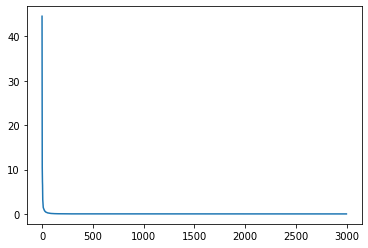

In [58]:
plt.plot(pca.explained_variance_)

156.827023519524


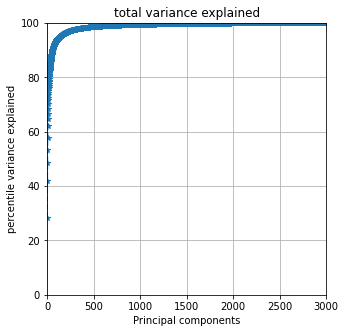

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
K=3000

total_variance_explained = np.zeros(min(pca.explained_variance_.shape[0],K))
for i in range(K):
    total_variance_explained[i] = np.sum(pca.explained_variance_[:i+1])
    
print(np.sum(pca.explained_variance_))
plt.plot(range(1,K+1),100*total_variance_explained/sum(pca.explained_variance_),"--*")
plt.grid();
plt.title('total variance explained')
plt.ylim(0,100)
plt.xlim(0,K)
plt.xlabel('Principal components')
plt.ylabel('percentile variance explained')
plt.show();

156.827023519524


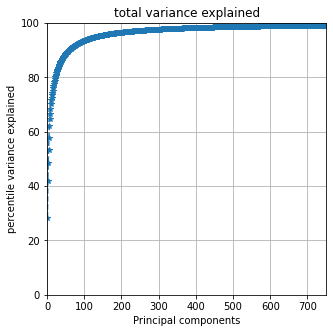

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
K=750

total_variance_explained = np.zeros(min(pca.explained_variance_.shape[0],K))
for i in range(K):
    total_variance_explained[i] = np.sum(pca.explained_variance_[:i+1])
    
print(np.sum(pca.explained_variance_))
plt.plot(range(1,K+1),100*total_variance_explained/sum(pca.explained_variance_),"--*")
plt.grid();
plt.title('total variance explained')
plt.ylim(0,100)
plt.xlim(0,K)
plt.xlabel('Principal components')
plt.ylabel('percentile variance explained')
plt.show();

In [13]:
100*total_variance_explained[750]/sum(pca.explained_variance_)

IndexError: index 750 is out of bounds for axis 0 with size 750

In [ ]:
pc = np.zeros(pca.components_.shape)
for index, component in enumerate(pca.components_):
    pc[index] = (component - np.min(component))/(np.max(component)-np.min(component))


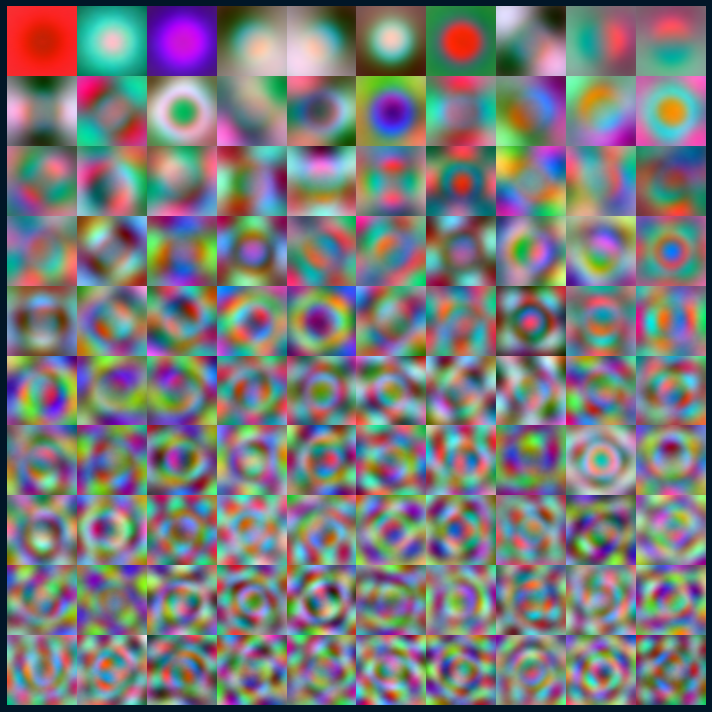

In [ ]:

size = 10
# plt.figure(figsize=(size*3,size*3))
# axs = [plt.subplot(size, size, i+1) for i in range(size**2)]
# for i in range(size**2):
#     axs[i].axis('off')
#     axs[i].set_aspect('equal')
#     axs[i].imshow(pc[i].reshape(68,68,3))

fig, axs = plt.subplots(size, size, figsize=(size,size), gridspec_kw=dict(hspace=0, wspace=0), facecolor = "#011627")
for x in range(size):
    for y in range(size):
        i = x*size+y
        axs[x,y].axis('off')
        axs[x,y].set_aspect('equal')
        axs[x,y].imshow(pc[i].reshape(68,68,3))
fig.tight_layout()
plt.show()

